# FinanceDataReader

- https://financedata.github.io/posts/finance-data-reader-users-guide.html#disqus_thread

## Usage

In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

### Get name

In [3]:
# 한국거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


### Get KOSPI data

In [4]:
df = fdr.DataReader('KS11')
df.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116
1981-05-08,118.7,118.7,118.7,118.7,1090000.0,-0.0050
1981-05-09,118.8,118.8,118.8,118.8,598000.0,0.0008
1981-05-12,118.8,118.8,118.8,118.8,543000.0,0.0000
1981-05-13,119.9,119.9,119.9,119.9,858000.0,0.0093


<AxesSubplot:xlabel='Date'>

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


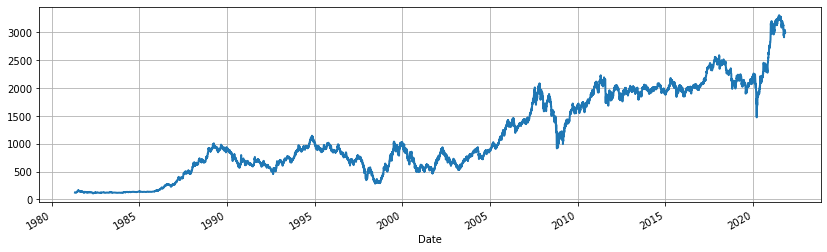

In [5]:
df["Open"].plot()

### Get IVV data after 2021.01.01

In [6]:
df = fdr.DataReader('IVV',"2021")
df.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-01-04,370.22,376.69,376.82,366.16,7100000.0,-0.0138
2021-01-05,372.67,369.44,373.83,369.44,4310000.0,0.0066
2021-01-06,374.92,371.02,378.37,370.46,4340000.0,0.0060
2021-01-07,380.47,377.47,381.26,377.28,6050000.0,0.0148
2021-01-08,382.64,382.01,382.86,378.49,3400000.0,0.0057
2021-01-11,380.14,379.23,381.92,379.12,3370000.0,-0.0065
2021-01-12,380.20,380.20,381.23,377.77,3490000.0,0.0002
2021-01-13,381.16,380.12,382.24,379.24,3760000.0,0.0025
2021-01-14,379.84,381.96,382.53,379.43,7000000.0,-0.0035


# Stratege 1: Dual Momentum(할 수 있다! 퀀트투자 - 강환국)
- S&P500, EuroStoxx, Nikkei, KOSPI 중 최근 6개월 간 가장 많이 상승한 지수 추종 ETF투자
- 4개 지수 모두 6개월 수익률이 예금금리 이하로 하락하면 모든 ETF 매도, 현금 보유
- 월 1회 리벨런싱

## 티커

- S&P500: TIGER 미국S&P500선물(H) - 143850
- EuroStoxx: TIGER 유로스탁스50(합성 H) - 195930
- Nikkei: TIGER 일본니케이225 - 241180
- KOSPI: KODEX200 - 069500

In [7]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [8]:
def normalize(data):
    return data / data[0]

In [9]:
def from_six_month_before(df):
    six_month_before = pd.to_datetime("today") - pd.Timedelta("180 days")
    return df.loc[six_month_before:]

In [10]:
year = "2021"

kospi = fdr.DataReader('069500', year)
sp500 = fdr.DataReader('143850', year)
nikkei = fdr.DataReader('241180', year)
euro = fdr.DataReader('195930', year)

In [11]:
kospi = from_six_month_before(kospi)
sp500 = from_six_month_before(sp500)
nikkei = from_six_month_before(nikkei)
euro = from_six_month_before(euro)

In [12]:
rate = 1.008

findfont: Font family ['nanummyeongjo'] not found. Falling back to DejaVu Sans.


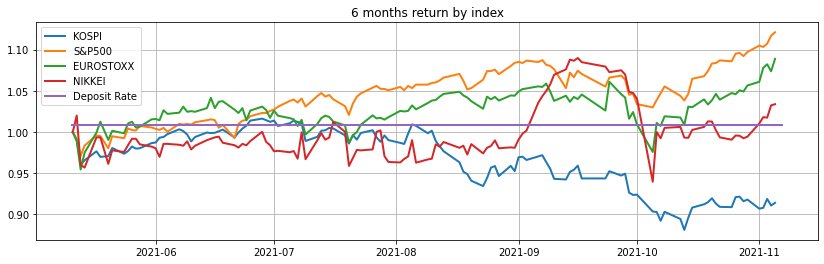

In [13]:
plt.plot(kospi.index, normalize(kospi["Open"]))
plt.plot(kospi.index, normalize(sp500["Open"]))
plt.plot(kospi.index, normalize(euro["Open"]))
plt.plot(kospi.index, normalize(nikkei["Open"]))

plt.plot([ pd.to_datetime("today") - pd.Timedelta("180 days"), pd.to_datetime("today")], [rate, rate])

plt.title("6 months return by index")
plt.legend(["KOSPI", "S&P500", "EUROSTOXX", "NIKKEI", "Deposit Rate"])

plt.show()
plt.close()